<a href="https://colab.research.google.com/github/insafhamdi/Diamond-Price-Prediction/blob/main/work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Choix de la donnée
Insérer le matricule pour fixer le dataset.

In [ ]:
matricule = 2200002 #Insérer le numéro/matricule de la carte d'étudiant
dataframe = data.sample(220, random_state = matricule)
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
38989,0.36,Ideal,G,VVS1,62.8,57.0,1053,4.55,4.52,2.85
6842,1.04,Premium,D,SI2,60.9,57.0,4123,6.54,6.49,3.97
24269,2.10,Premium,J,SI2,59.1,58.0,12494,8.46,8.40,4.98
34988,0.34,Ideal,E,VS1,62.0,57.0,881,4.49,4.44,2.77
10542,1.01,Ideal,I,VS1,62.6,56.0,4808,6.42,6.36,4.00


In [ ]:
input_cols = ["carat", "depth", "table"]
categorical_cols = ["color", "clarity"]
output_cols = ["price"]

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array[:3], targets_array[:3]

(array([[ 0.36, 62.8 , 57.  ],
        [ 1.04, 60.9 , 57.  ],
        [ 2.1 , 59.1 , 58.  ]]),
 array([[ 1053],
        [ 4123],
        [12494]]))

In [ ]:
input_cols = ["carat", "y"]
categorical_cols = ["color", "clarity"]
output_cols = ["price"]

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array[:3], targets_array[:3]

(array([[0.36, 4.52],
        [1.04, 6.49],
        [2.1 , 8.4 ]]),
 array([[ 1053],
        [ 4123],
        [12494]]))



# **<font color='pink'>Q.1.1 </font>**<br>

In [ ]:
dataframe.shape

(220, 10)

In [ ]:
dataframe.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 38989 to 16370
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    220 non-null    float64 
 1   cut      220 non-null    category
 2   color    220 non-null    category
 3   clarity  220 non-null    category
 4   depth    220 non-null    float64 
 5   table    220 non-null    float64 
 6   price    220 non-null    int64   
 7   x        220 non-null    float64 
 8   y        220 non-null    float64 
 9   z        220 non-null    float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 15.3 KB


In [ ]:
dataframe.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
dataframe.describe()

,carat,depth,table,price,x,y,z
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.758227,61.583182,57.584545,3523.013636,5.657909,5.661818,3.485364
std,0.431010,1.417902,2.145833,3469.387802,1.058345,1.055384,0.655153
min,0.230000,56.300000,53.000000,338.000000,3.900000,3.930000,2.350000
25%,0.387500,60.800000,56.000000,983.500000,4.692500,4.695000,2.867500
50%,0.700000,61.700000,57.000000,2310.500000,5.650000,5.675000,3.485000
75%,1.010000,62.325000,59.000000,4672.250000,6.422500,6.465000,3.990000
max,2.100000,69.800000,65.000000,17598.000000,8.460000,8.400000,5.080000


In [ ]:
mean_price = dataframe['price'].mean()
print(mean_price)


3523.0136363636366


          carat     depth     table     price         x         y         z
carat  1.000000  0.049646  0.194620  0.913200  0.983029  0.981589  0.980704
depth  0.049646  1.000000 -0.304907 -0.034438  0.006169 -0.000379  0.130235
table  0.194620 -0.304907  1.000000  0.129019  0.205778  0.206170  0.166283
price  0.913200 -0.034438  0.129019  1.000000  0.883135  0.885435  0.871646
x      0.983029  0.006169  0.205778  0.883135  1.000000  0.998995  0.991806
y      0.981589 -0.000379  0.206170  0.885435  0.998995  1.000000  0.990960
z      0.980704  0.130235  0.166283  0.871646  0.991806  0.990960  1.000000


<ipython-input-282-c66ea811cdab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.corr())
<ipython-input-282-c66ea811cdab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), cmap = "RdBu_r", square = True, annot=True, cbar=True)


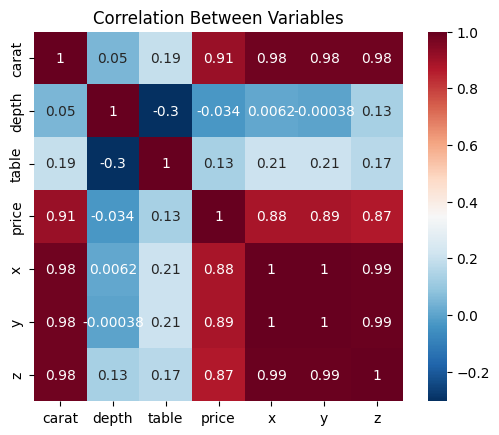

In [ ]:
print(dataframe.corr())
sns.heatmap(dataframe.corr(), cmap = "RdBu_r", square = True, annot=True, cbar=True)
plt.title("Correlation Between Variables")
plt.show()




**<font color='tiffany bleu'>Interpretation : </font>**<br>
 en se basant sur cette matrice de corrélation, nous pouvons voir que carat, x, y et z sont fortement corrélés positivement entre eux et avec le prix, tandis que la profondeur et la table sont faiblement corrélées négativement avec le prix. cela implique que carat, x, y et z peuvent être des prédicteurs importants du prix, alors que la profondeur et la table peuvent être moins importantes. 




# **<font color='pink'>Q.1.2 (etude statistique des variables quantitatives)</font>**<br>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les variables d'intérêt
variables = ['carat', 'x', 'y', 'z','price']
inputs = dataframe[variables].values
inputs.shape[1]

5

## **<font color='pink'>Carat</font>**<br>


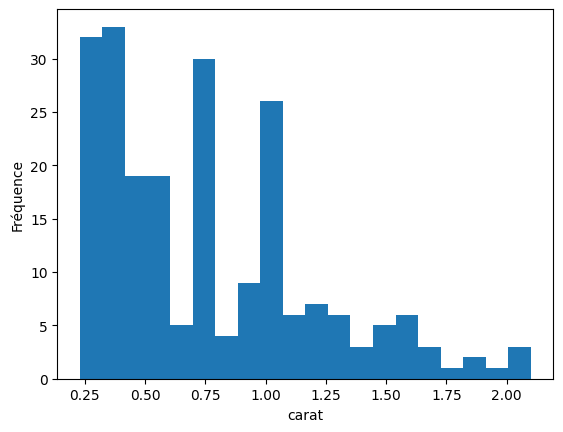

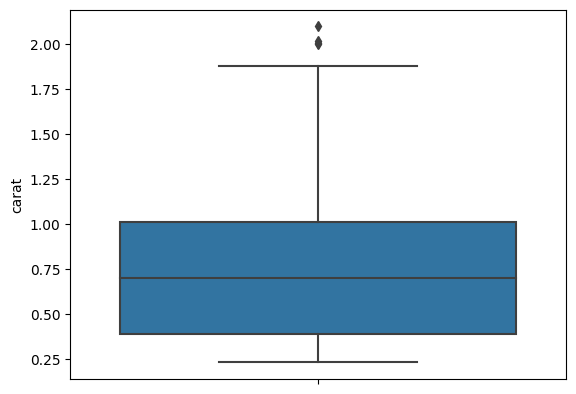

Statistiques descriptives pour la variable 'carat':
Moyenne : 0.76
Ecart-type : 0.43
Erreur-type : 0.03
Intervalle de confiance pour la moyenne : (0.70, 0.82)
Quartiles : Q1 = 0.39, Q2 = 0.70, Q3 = 1.01
Ecart interquartile : 0.62




In [ ]:
# Afficher l'histogramme pour chaque variable
plt.hist(inputs[:,0], bins=20)
plt.xlabel(variables[0])
plt.ylabel('Fréquence')
plt.show()


# Afficher le boxplot pour chaque variable
sns.boxplot(y=inputs[:,0])
plt.ylabel(variables[0])
plt.show()
# Calculer les statistiques descriptives pour chaque variable
mean = inputs[:,0].mean()
std = inputs[:,0].std()
se = std / np.sqrt(inputs[:,0].shape[0])
ci = (mean - 1.96 * se, mean + 1.96 * se)
quartiles = np.percentile(inputs[:,0], [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
print("Statistiques descriptives pour la variable '{}':".format(variables[0]))
print("Moyenne : {:.2f}".format(mean))
print("Ecart-type : {:.2f}".format(std))
print("Erreur-type : {:.2f}".format(se))
print("Intervalle de confiance pour la moyenne : ({:.2f}, {:.2f})".format(ci[0], ci[1]))
print("Quartiles : Q1 = {:.2f}, Q2 = {:.2f}, Q3 = {:.2f}".format(quartiles[0], quartiles[1], quartiles[2]))
print("Ecart interquartile : {:.2f}".format(iqr))
print("\n")


<Axes: xlabel='carat', ylabel='Count'>

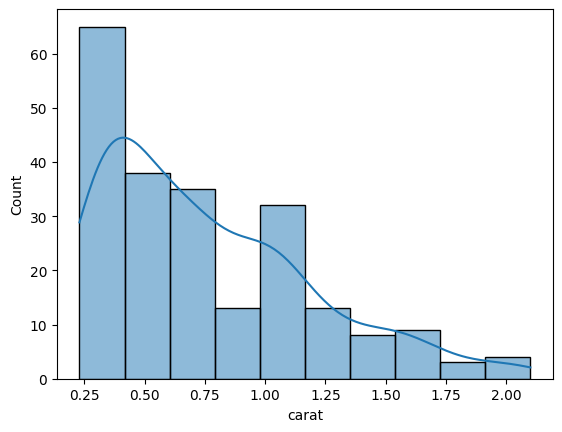

In [ ]:
sns.histplot(dataframe, x='carat', kde=True)


**<font color='tiffany bleu'>Interpretation : </font>**<br>
- les statistiques descriptives donnent des mesures numériques pour résumer les données. La moyenne de la variable est de 0,76 et son écart-type est de 0,43, ce qui indique une certaine variabilité dans les données.
- l'erreur-type est de 0,03, ce qui signifie que la moyenne calculée à partir de l'échantillon est susceptible d'être éloignée de la moyenne réelle de la population de 0,03. 
- l'intervalle de confiance à 95% pour la moyenne se situe entre 0,70 et 0,82. - les quartiles sont de 0,39 pour Q1, 0,70 pour Q2 et 1,01 pour Q3. l'écart interquartile est de 0,62.


## **<font color='pink'>X</font>**<br>

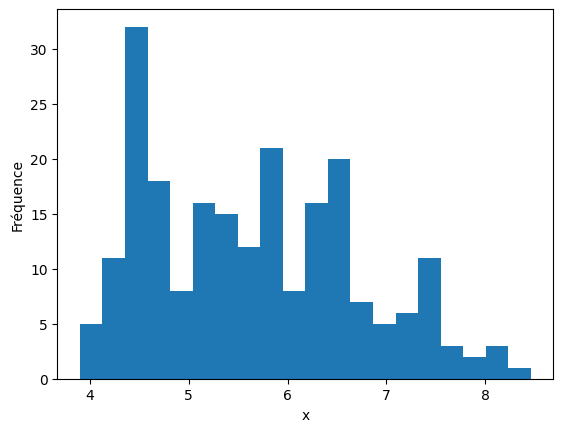

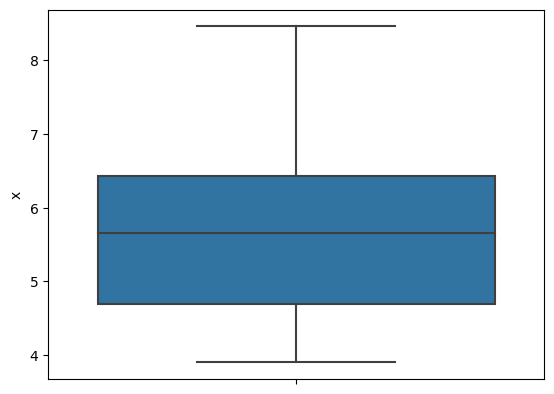

Statistiques descriptives pour la variable 'x':
Moyenne : 5.66
Ecart-type : 1.06
Erreur-type : 0.07
Intervalle de confiance pour la moyenne : (5.52, 5.80)
Quartiles : Q1 = 4.69, Q2 = 5.65, Q3 = 6.42
Ecart interquartile : 1.73




In [ ]:
# Afficher l'histogramme pour chaque variable

plt.hist(inputs[:,1], bins=20)
plt.xlabel(variables[1])
plt.ylabel('Fréquence')
plt.show()

# Afficher le boxplot pour chaque variable
sns.boxplot(y=inputs[:,1])
plt.ylabel(variables[1])
plt.show()

# Calculer les statistiques descriptives pour chaque variable
mean = inputs[:,1].mean()
std = inputs[:,1].std()
se = std / np.sqrt(inputs[:,1].shape[0])
ci = (mean - 1.96 * se, mean + 1.96 * se)
quartiles = np.percentile(inputs[:,1], [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
print("Statistiques descriptives pour la variable '{}':".format(variables[1]))
print("Moyenne : {:.2f}".format(mean))
print("Ecart-type : {:.2f}".format(std))
print("Erreur-type : {:.2f}".format(se))
print("Intervalle de confiance pour la moyenne : ({:.2f}, {:.2f})".format(ci[0], ci[1]))
print("Quartiles : Q1 = {:.2f}, Q2 = {:.2f}, Q3 = {:.2f}".format(quartiles[0], quartiles[1], quartiles[2]))
print("Ecart interquartile : {:.2f}".format(iqr))
print("\n")


<Axes: xlabel='x', ylabel='Count'>

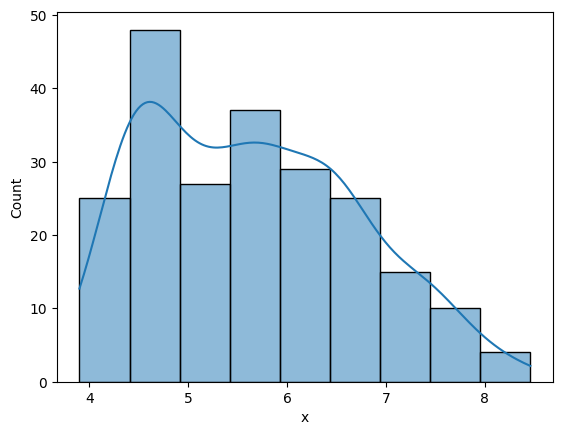

In [ ]:
sns.histplot(dataframe, x='x', kde=True)



**<font color='tiffany bleu'>Interpretation : </font>**<br>
- l'erreur-type est de 0,07, ce qui signifie que l'estimation de la moyenne à partir de l'échantillon est précise à environ 7 %.

- l'intervalle de confiance pour la moyenne est de (5,52, 5,80) avec un niveau de confiance de 95 %. Cela signifie qu'il y a une probabilité de 95 % que la moyenne de la population se situe dans cet intervalle.

- les quartiles sont Q1 = 4,69, Q2 = 5,65 et Q3 = 6,42. Cela signifie que 25 % des valeurs sont inférieures à 4,69, 50 % des valeurs sont inférieures à 5,65 et 75 % des valeurs sont inférieures à 6,42.

- l'écart interquartile est de 1,73, ce qui suggère que la dispersion des valeurs autour de la médiane est assez importante.

- l'histogramme et le boxplot, prouvent que la distribution de la variable 'x' semble être à peu près symétrique et sans valeurs aberrantes.



## **<font color='pink'>Y</font>**<br>

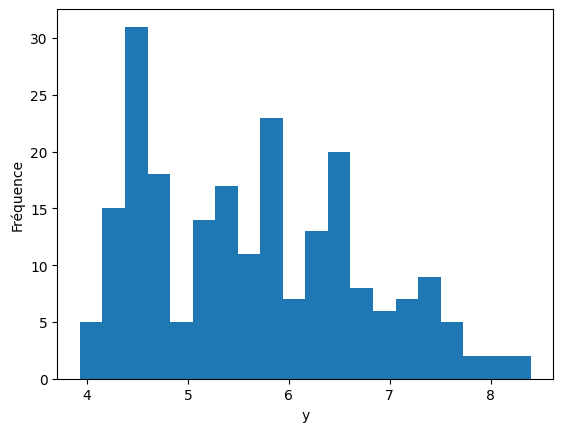

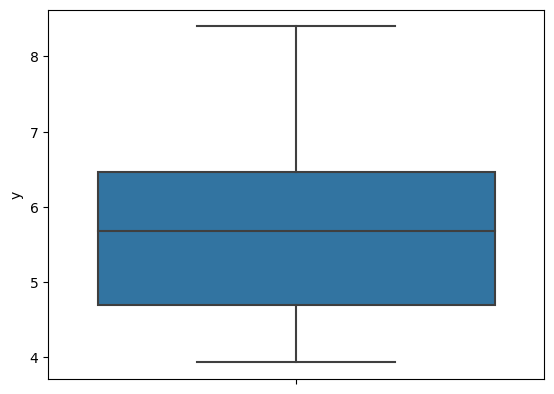

Statistiques descriptives pour la variable 'y':
Moyenne : 5.66
Ecart-type : 1.05
Erreur-type : 0.07
Intervalle de confiance pour la moyenne : (5.52, 5.80)
Quartiles : Q1 = 4.70, Q2 = 5.68, Q3 = 6.46
Ecart interquartile : 1.77




In [ ]:
# Afficher l'histogramme pour chaque variable

plt.hist(inputs[:,2], bins=20)
plt.xlabel(variables[2])
plt.ylabel('Fréquence')
plt.show()

# Afficher le boxplot pour chaque variable
sns.boxplot(y=inputs[:,2])
plt.ylabel(variables[2])
plt.show()

# Calculer les statistiques descriptives pour chaque variable
mean = inputs[:,2].mean()
std = inputs[:,2].std()
se = std / np.sqrt(inputs[:,2].shape[0])
ci = (mean - 1.96 * se, mean + 1.96 * se)
quartiles = np.percentile(inputs[:,2], [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
print("Statistiques descriptives pour la variable '{}':".format(variables[2]))
print("Moyenne : {:.2f}".format(mean))
print("Ecart-type : {:.2f}".format(std))
print("Erreur-type : {:.2f}".format(se))
print("Intervalle de confiance pour la moyenne : ({:.2f}, {:.2f})".format(ci[0], ci[1]))
print("Quartiles : Q1 = {:.2f}, Q2 = {:.2f}, Q3 = {:.2f}".format(quartiles[0], quartiles[1], quartiles[2]))
print("Ecart interquartile : {:.2f}".format(iqr))
print("\n")

<Axes: xlabel='y', ylabel='Count'>

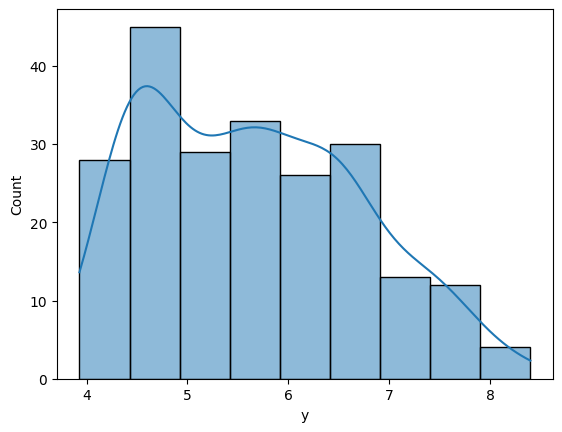

In [ ]:
sns.histplot(dataframe, x='y', kde=True)


**<font color='tiffany bleu'>Interpretation : </font>**<br>
 on peut remarquer que la variable 'y' a des résultats similaires à la variable 'x', avec une moyenne et une médiane presque identiques. l'écart-type et l'erreur-type sont également très proches, ainsi que les intervalles de confiance. cependant, la variable 'y' a une valeur plus élevée pour le troisième quartile et l'écart interquartile que la variable 'x'. ceci peut indiquer une plus grande dispersion des valeurs pour 'y' par rapport à 'x'.

## **<font color='pink'>Z</font>**<br>

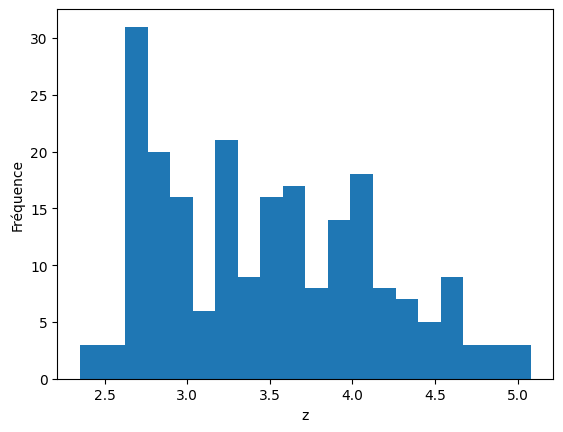

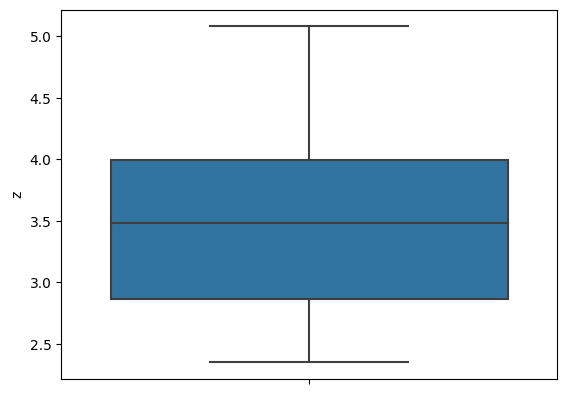

Statistiques descriptives pour la variable 'z':
Moyenne : 3.49
Ecart-type : 0.65
Erreur-type : 0.04
Intervalle de confiance pour la moyenne : (3.40, 3.57)
Quartiles : Q1 = 2.87, Q2 = 3.49, Q3 = 3.99
Ecart interquartile : 1.12




In [ ]:
# Afficher l'histogramme pour chaque variable

plt.hist(inputs[:,3], bins=20)
plt.xlabel(variables[3])
plt.ylabel('Fréquence')
plt.show()

# Afficher le boxplot pour chaque variable
sns.boxplot(y=inputs[:,3])
plt.ylabel(variables[3])
plt.show()

# Calculer les statistiques descriptives pour chaque variable
mean = inputs[:,3].mean()
std = inputs[:,3].std()
se = std / np.sqrt(inputs[:,3].shape[0])
ci = (mean - 1.96 * se, mean + 1.96 * se)
quartiles = np.percentile(inputs[:,3], [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
print("Statistiques descriptives pour la variable '{}':".format(variables[3]))
print("Moyenne : {:.2f}".format(mean))
print("Ecart-type : {:.2f}".format(std))
print("Erreur-type : {:.2f}".format(se))
print("Intervalle de confiance pour la moyenne : ({:.2f}, {:.2f})".format(ci[0], ci[1]))
print("Quartiles : Q1 = {:.2f}, Q2 = {:.2f}, Q3 = {:.2f}".format(quartiles[0], quartiles[1], quartiles[2]))
print("Ecart interquartile : {:.2f}".format(iqr))
print("\n")

<Axes: xlabel='z', ylabel='Count'>

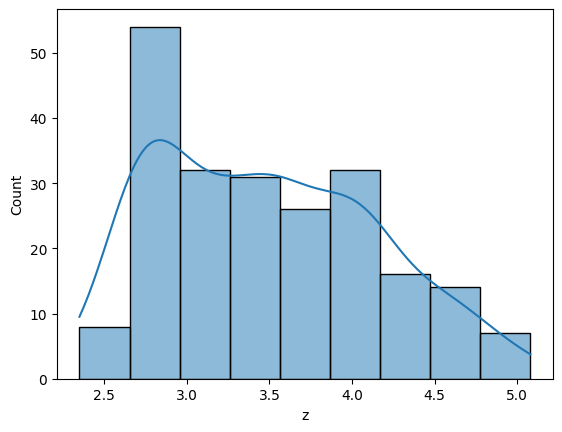

In [ ]:
sns.histplot(dataframe, x='z', kde=True)


**<font color='tiffany bleu'>Interpretation : </font>**<br>
 les statistiques descriptives pour la variable 'z'  montre que la distribution de la variable 'z' est relativement centrée autour de la moyenne, avec un écart-type modéré. Les valeurs des quartiles indiquent une certaine dispersion, avec un écart interquartile plus petit que pour les variables 'x' et 'y'.

## **<font color='pink'>Price</font>**<br>



Text(0.5, 1.0, 'Distribution de prix')

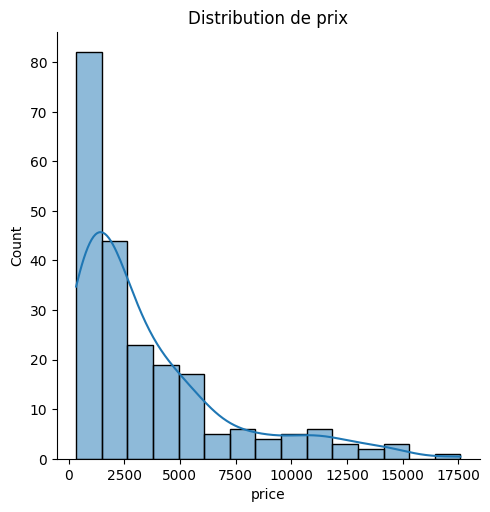

In [ ]:
# Distribution de price
sns.displot(data=dataframe, x="price", kde=True)
plt.title("Distribution de prix")

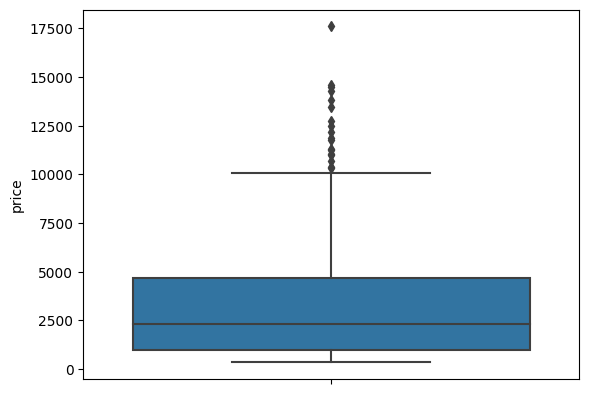

Statistiques descriptives pour la variable 'price':
Moyenne : 3523.01
Ecart-type : 3461.49
Erreur-type : 233.37
Intervalle de confiance pour la moyenne : (3065.60, 3980.43)
Quartiles : Q1 = 983.50, Q2 = 2310.50, Q3 = 4672.25
Ecart interquartile : 3688.75




In [ ]:

# Afficher le boxplot pour chaque variable
sns.boxplot(y=inputs[:,4])
plt.ylabel(variables[4])
plt.show()

# Calculer les statistiques descriptives pour chaque variable
mean = inputs[:,4].mean()
std = inputs[:,4].std()
se = std / np.sqrt(inputs[:,4].shape[0])
ci = (mean - 1.96 * se, mean + 1.96 * se)
quartiles = np.percentile(inputs[:,4], [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
print("Statistiques descriptives pour la variable '{}':".format(variables[4]))
print("Moyenne : {:.2f}".format(mean))
print("Ecart-type : {:.2f}".format(std))
print("Erreur-type : {:.2f}".format(se))
print("Intervalle de confiance pour la moyenne : ({:.2f}, {:.2f})".format(ci[0], ci[1]))
print("Quartiles : Q1 = {:.2f}, Q2 = {:.2f}, Q3 = {:.2f}".format(quartiles[0], quartiles[1], quartiles[2]))
print("Ecart interquartile : {:.2f}".format(iqr))
print("\n")

Text(0.5, 1.0, 'Relation entre carat et price')

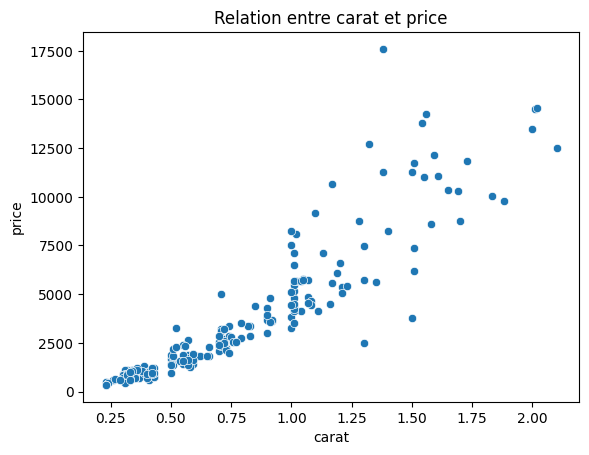

In [ ]:
import seaborn as sns

# Scatterplot entre carat et price
sns.scatterplot(data=dataframe, x="carat", y="price")
plt.title("Relation entre carat et price")




**<font color='tiffany bleu'>Interpretation : </font>**<br>
- la distribution des prix est fortement asymétrique et possède une longue queue à droite. 
-la moyenne des prix est de 3523.01 dollars, avec un écart-type de 3461.49 dollars, indiquant une grande variabilité des prix. 
-les quartiles montrent que la moitié des diamants coûtent moins de 2310.50 dollars, alors que le quartile supérieur indique que le prix de 25% des diamants dépasse 4672.25 dollars.

- le boxplot confirme la forte asymétrie de la distribution des prix, avec la majorité des valeurs situées en dessous de 5000 dollars et quelques valeurs extrêmes allant jusqu'à plus de 18000 dollars.

- la variable 'price' présente une forte variabilité, une asymétrie importante, des valeurs aberrantes et une queue longue à droite, avec des prix allant jusqu'à plus de 18000 dollars.
-le Scatter Plot montre une relation positive entre le prix et le carat, ce qui est attendu car les diamants plus gros ont tendance à coûter plus cher. Cependant, il y a une grande dispersion des données, ce qui suggère que d'autres facteurs peuvent également influencer le prix.



Text(0.5, 1.05, 'Pairplot pour les variables quantitatives')

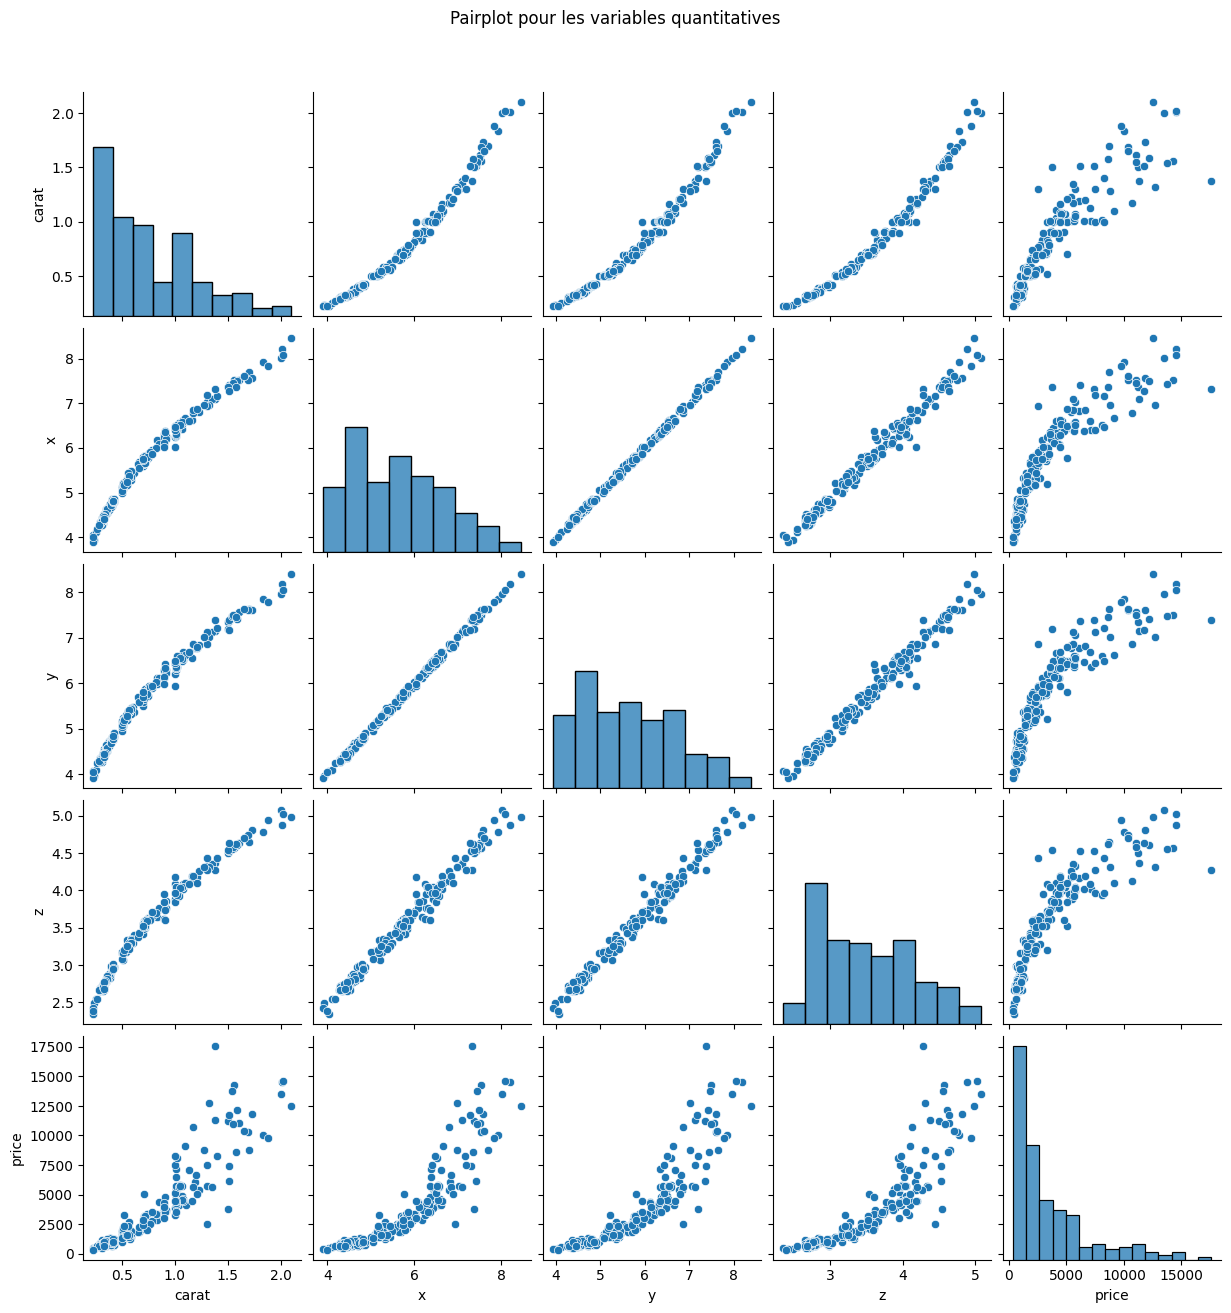

In [ ]:
# pairplot pour les variables quantitatives
sns.pairplot(data=dataframe[["carat","x", "y","z", "price"]])
plt.suptitle("Pairplot pour les variables quantitatives", y=1.05)


**<font color='tiffany bleu'>Interpretation</font>**<br>


- la diagonale du pairplot (les histogrammes) montre la distribution de chaque variable. On peut ainsi observer que les variables 'carat', 'x', 'y', 'z' et 'price' ont des distributions asymétriques.
- les scatterplots permettent de visualiser les relations linéaires entre deux variables. d'ou une forte relation linéaire positive entre 'carat' et 'price', ce qui est attendu étant donné que le carat est une mesure du poids de la pierre précieuse et que le prix est généralement proportionnel à ce poids. on peut également observer une relation linéaire positive entre 'x', 'y', 'z' et 'price', ce qui suggère que la taille de la pierre précieuse a un impact sur son prix.
- le pairplot suggère que les variables 'carat', 'x', 'y', 'z' ont des relations linéaires positives avec le prix.

## **<font color='pink'>Etude statistique des variables qualititatives</font>**<br>



In [ ]:
for col in ['cut','color','clarity']:
    print('{} : {}'.format(col,dataframe[col].unique()))
dataframe.nunique() 

cut : ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color : ['G', 'D', 'J', 'E', 'I', 'F', 'H']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity : ['VVS1', 'SI2', 'VS1', 'VVS2', 'SI1', 'VS2', 'IF', 'I1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


carat       87
cut          5
color        7
clarity      8
depth       57
table       16
price      213
x          162
y          160
z          129
dtype: int64

### **<font color='pink'>PRICE ~ CUT</font>**<br>


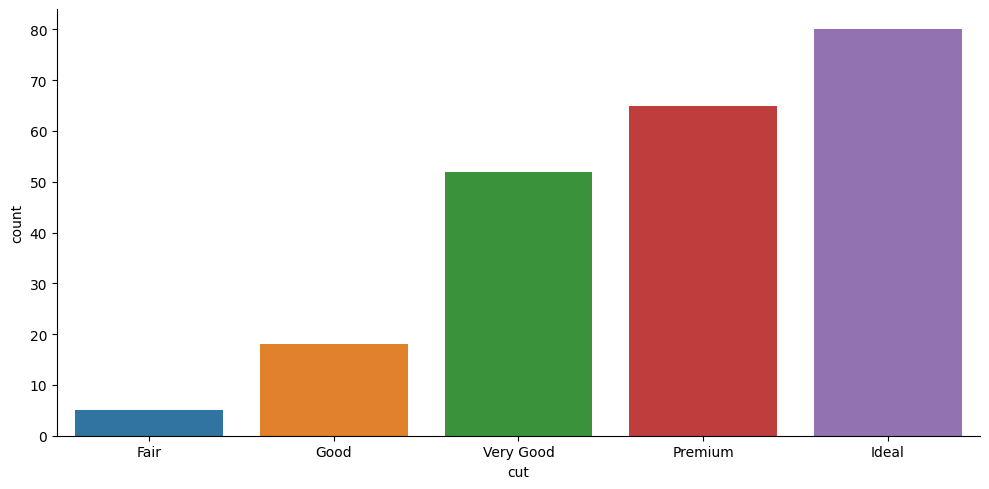

In [ ]:
sns.catplot(x='cut', data=dataframe , kind='count',aspect=2,order=['Fair','Good','Very Good','Premium','Ideal'] )

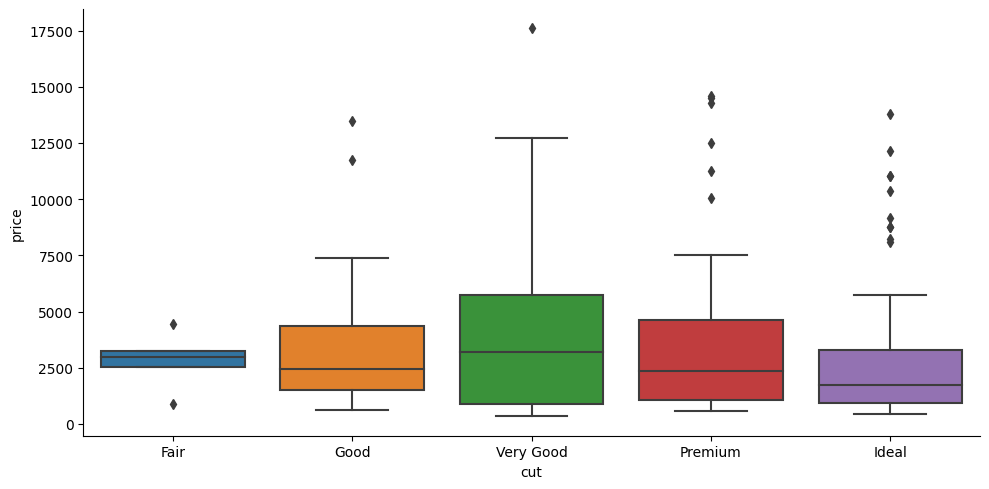

In [ ]:
sns.catplot(x='cut', y = 'price',data=dataframe ,aspect=2,kind='box' ,order=['Fair','Good','Very Good','Premium','Ideal'])


**<font color='tiffany bleu'>Explication des graphiques</font>**<br>
- le premier graphique est un graphique à barres qui affiche le nombre de diamants pour chaque type de coupe ('cut'), classé par ordre croissant. Le paramètre 'kind' est défini sur 'count', ce qui signifie que la fonction catplot compte le nombre d'occurrences de chaque catégorie.
- le deuxième graphique est un graphique en boîte qui montre la distribution des prix pour chaque type de coupe. Le paramètre 'kind' est défini sur 'box', ce qui signifie que la fonction catplot affiche la distribution des données sous forme de boîtes. La ligne à l'intérieur de chaque boîte représente la médiane, la limite inférieure de la boîte est le premier quartile et la limite supérieure de la boîte est le troisième quartile. Les points à l'extérieur de la boîte sont les valeurs aberrantes.

**<font color='tiffany bleu'>Interpretation</font>**<br>
- en observant les graphiques, on peut noter quee la coupe 'Ideal' a la plus grande valeur parmi les coupes, cela implique qu'elle est la plus populaire.
- le graphique en boîte montre que la coupe 'Very Good' a le boxplot le plus long, ce qui indique une plus grande variance dans les prix pour cette coupe par rapport aux autres coupes.
- **la qualité de la coupe (cut) a une forte influence sur le prix des diamants, avec la qualité "Ideal" ayant la plus grande valeur et la qualité "Fair" ayant la plus petite valeur.**

### **<font color='pink'>PRICE ~ COLOR</font>**<br>

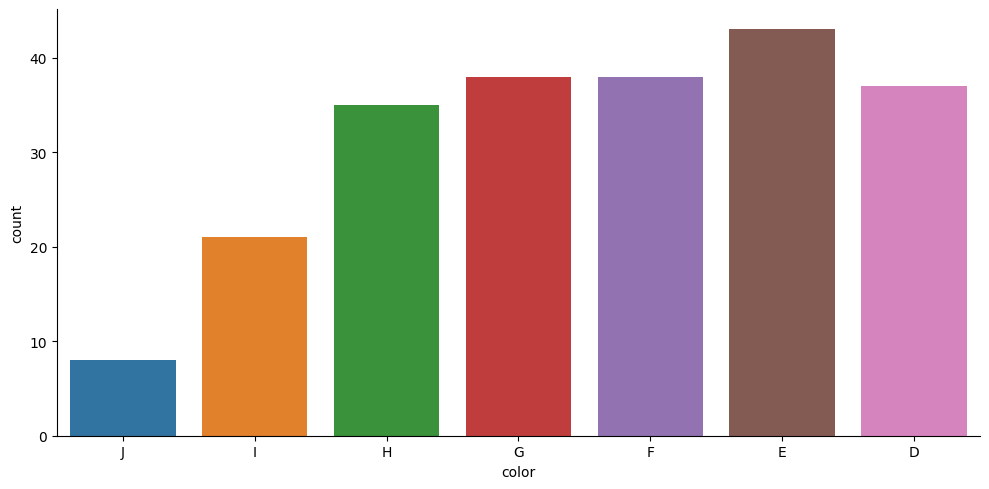

In [ ]:
sns.catplot(x='color', data=dataframe , kind='count',aspect=2 ,order=['J','I','H','G','F','E','D'])


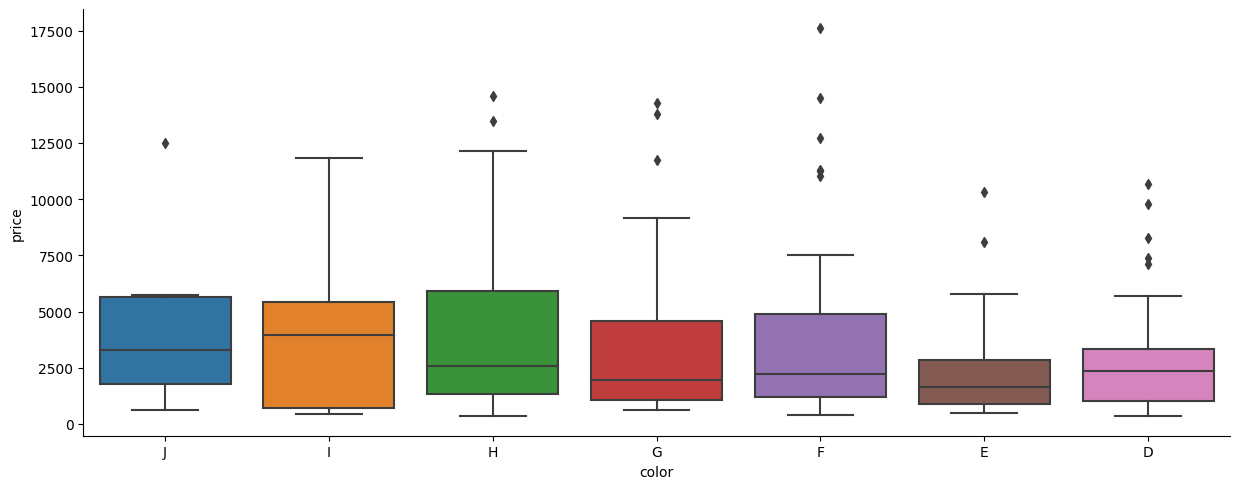

In [ ]:
sns.catplot(x='color', y='price', data=dataframe ,aspect=2.5,kind='box',order=['J','I','H','G','F','E','D'] )

**<font color='tiffany bleu'>Interpretation</font>**<br>
- **la couleur (color) a également une influence significative sur le prix des diamants, avec la couleur "E" ayant la plus grande valeur et la couleur "J" ayant la plus petite valeur.**

### **<font color='pink'>PRICE ~ CLARITY</font>**<br>

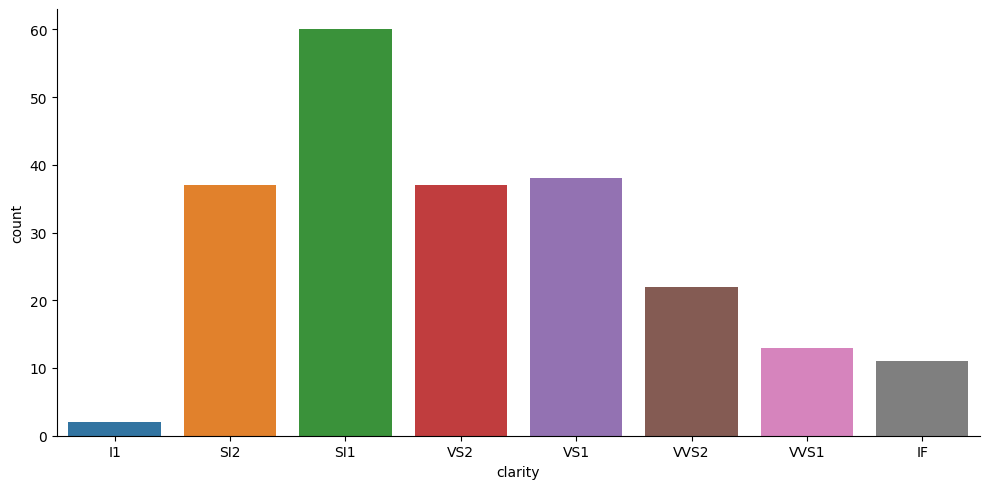

In [ ]:
sns.catplot(x='clarity', data=dataframe , kind='count',aspect=2 ,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

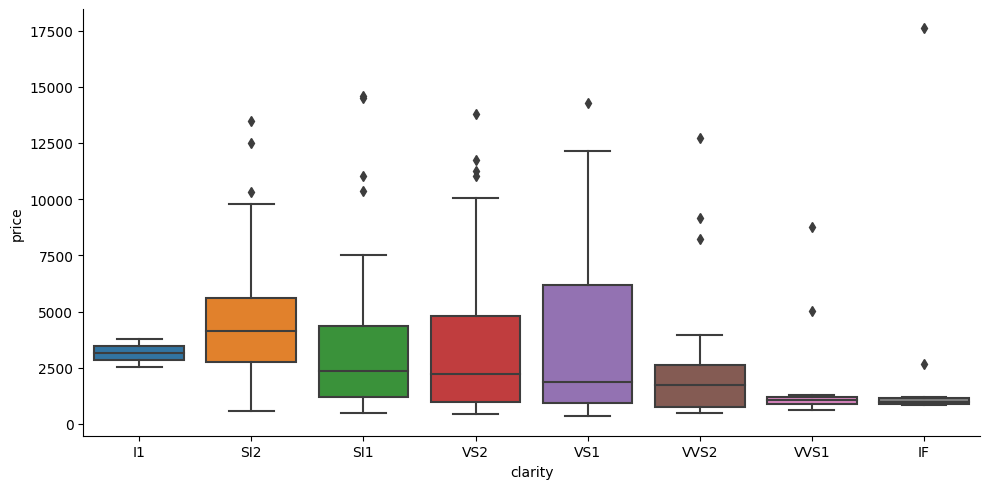

In [ ]:
sns.catplot(x='clarity',y='price',data=dataframe, kind='box',aspect=2,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

**<font color='tiffany bleu'>Interpretation</font>**<br>

- **la clarté (clarity) semble également avoir un impact sur le prix des diamants, mais dans une moindre mesure que la coupe et la couleur.**

la clarté des diamants mesure la présence de défauts internes et externes dans le diamant, tels que des inclusions et des fissures. ces défauts ont un impact sur la façon dont la lumière est réfractée à travers le diamant et peuvent donc affecter la brillance et la beauté apparente du diamant.
cependant, contrairement à la coupe et à la couleur, la clarté n'a pas un impact aussi significatif sur la beauté apparente d'un diamant. par conséquent, son impact sur le prix est généralement inférieur à celui de la coupe et de la couleur. cela est reflété dans les graphiques que j'ai produits, où le nombre de diamants dans chaque catégorie de clarté est plus uniformément réparti, et où les différences de prix entre les différentes catégories de clarté sont moins marquées que celles observées pour la coupe et la couleur.

In [ ]:
ct1 = pd.crosstab(dataframe['cut'], dataframe['color'])
ct2 = pd.crosstab(dataframe['cut'], dataframe['clarity'])
ct3 = pd.crosstab(dataframe['color'], dataframe['clarity'])

print(ct1)
print(ct2)
print(ct3)


color       D   E   F   G   H  I  J
cut                                
Ideal       8  16  13  15  17  8  3
Premium    13  12  12  13   7  7  1
Very Good  11  11  10   5   8  4  3
Good        4   3   3   4   2  1  1
Fair        1   1   0   1   1  1  0
clarity    IF  VVS1  VVS2  VS1  VS2  SI1  SI2  I1
cut                                              
Ideal       7     8    12   18   16   16    3   0
Premium     1     3     5    9    8   20   18   1
Very Good   3     1     3   11    5   19   10   0
Good        0     0     2    0    6    5    5   0
Fair        0     1     0    0    2    0    1   1
clarity  IF  VVS1  VVS2  VS1  VS2  SI1  SI2  I1
color                                          
D         0     1     2    3    8   13    9   1
E         0     1     4    8    7   15    8   0
F         6     3     2    8    6    6    7   0
G         3     5     5    6    7    8    4   0
H         1     2     5    8    3   10    5   1
I         1     1     4    4    3    5    3   0
J         0   

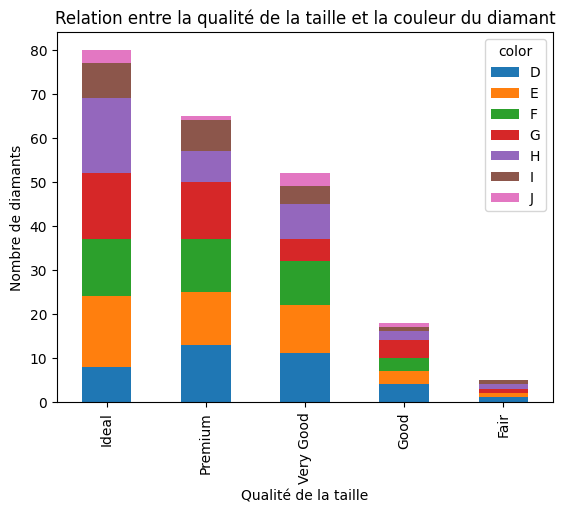

In [ ]:
import matplotlib.pyplot as plt

ct1.plot(kind='bar', stacked=True)
plt.title('Relation entre la qualité de la taille et la couleur du diamant')
plt.xlabel('Qualité de la taille')
plt.ylabel('Nombre de diamants')
plt.show()



**<font color='tiffany bleu'>Interpretation</font>**<br>
- le graphique de barres empilées représente le nombre de diamants pour chaque combinaison de qualité de la taille et de couleur. Chaque barre représente une catégorie de qualité de la taille, et à l'intérieur de chaque barre, les segments colorés représentent les différentes couleurs des diamants. La hauteur totale de chaque barre indique le nombre total de diamants dans cette catégorie de qualité de la taille, et les segments colorés montrent comment ces diamants sont répartis selon leur couleur.

- ce graphique permet de visualiser la distribution des diamants en fonction de la qualité de la taille et de la couleur. On peut observer les variations du nombre de diamants dans chaque catégorie en fonction de la couleur. par exemple, on peut déterminer si certaines couleurs sont plus fréquentes dans certaines catégories de qualité de la taille. comme la couleur 'D' elle est plus frequenté dans le premium. 



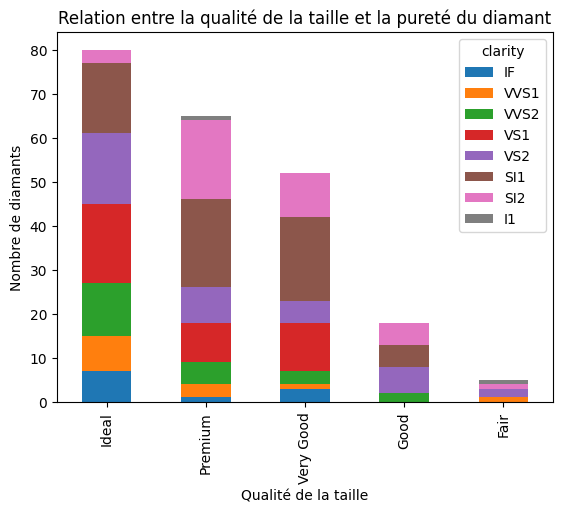

In [ ]:
ct2.plot(kind='bar', stacked=True)
plt.title('Relation entre la qualité de la taille et la pureté du diamant')
plt.xlabel('Qualité de la taille')
plt.ylabel('Nombre de diamants')
plt.show()


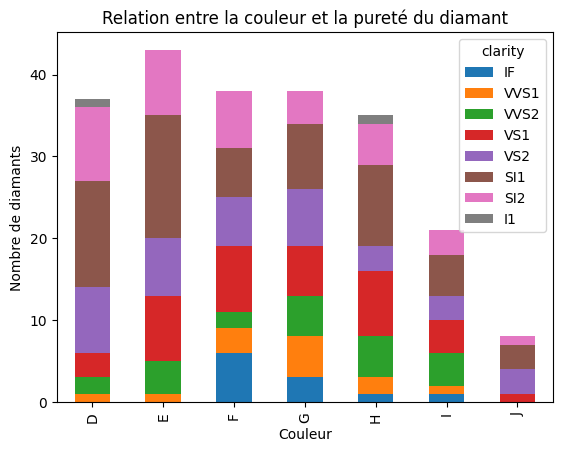

In [ ]:
ct3.plot(kind='bar', stacked=True)
plt.title('Relation entre la couleur et la pureté du diamant')
plt.xlabel('Couleur')
plt.ylabel('Nombre de diamants')
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats

# Variables qualitatives
qual_vars = ['cut', 'color', 'clarity']

# Test de comparaison de moyennes
for var in qual_vars:
    print('Comparaison de moyennes pour la variable :', var)
    groups = dataframe.groupby(var)['price'].apply(list)
    f, p = stats.f_oneway(*groups)
    print('F-statistic :', f)
    print('p-value :', p)
    print('__________________________________________________________')


Comparaison de moyennes pour la variable : cut
F-statistic : 1.2501896055373023
p-value : 0.29076420530838726
__________________________________________________________
Comparaison de moyennes pour la variable : color
F-statistic : 1.7251040398750672
p-value : 0.11642974741583714
__________________________________________________________
Comparaison de moyennes pour la variable : clarity
F-statistic : 1.538788864786748
p-value : 0.1556037410346475
__________________________________________________________



**<font color='tiffany bleu'>Interpretation : </font>**<br>
- le F-statistic mesure la différence entre les moyennes des différentes catégories et la moyenne globale, et la p-value mesure la significativité de cette différence.
- pour la variable "cut", le F-statistic est de 1.25 avec une p-value de 0.29, ce qui indique qu'il n'y a pas de différence significative entre les moyennes des différents types de coupe de diamant en ce qui concerne le prix.

- pour la variable "color", le F-statistic est de 1.73 avec une p-value de 0.12, ce qui suggère qu'il y a une légère différence entre les moyennes des différents types de couleur, mais cette différence n'est pas statistiquement significative.

- pour la variable "clarity", le F-statistic est de 1.54 avec une p-value de 0.16, ce qui indique qu'il n'y a pas de différence significative entre les moyennes des différents types de clarté en ce qui concerne le prix.

- ces tests ne montrent pas de différence significative entre les moyennes des différentes catégories pour chaque variable qualitative. donc ces variables n'ont pas d'effet important sur le prix des diamants.


- les résultats de l'analyse de variance (ANOVA) pour les variables qualitatives (cut, color, clarity) montrent des F-statistiques assez faibles et des p-values supérieures à 0.05, ce qui indique que la relation entre ces variables et le prix n'est pas statistiquement significative.  d'autres analyses, comme des tests de corrélation ou des modèles de régression, pourraient être nécessaires pour explorer davantage ces relations.

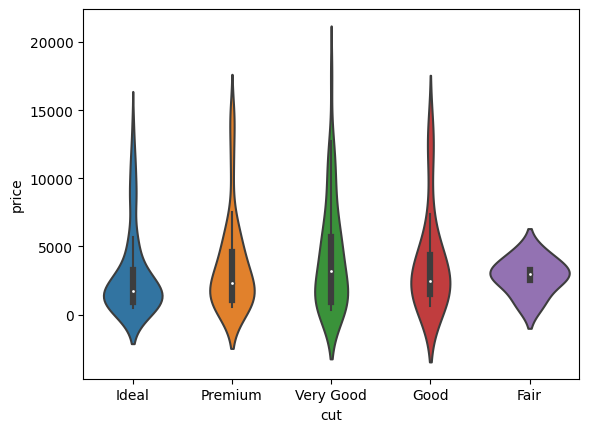

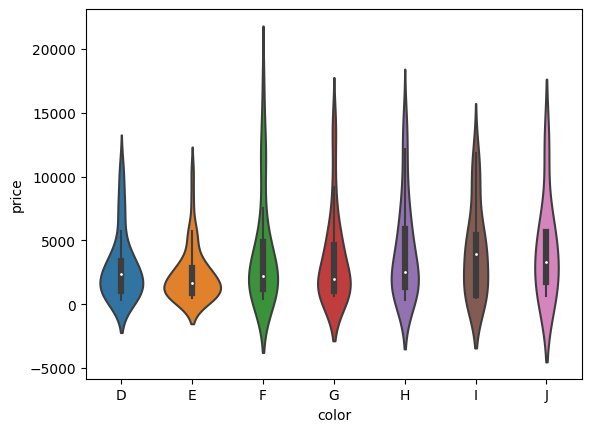

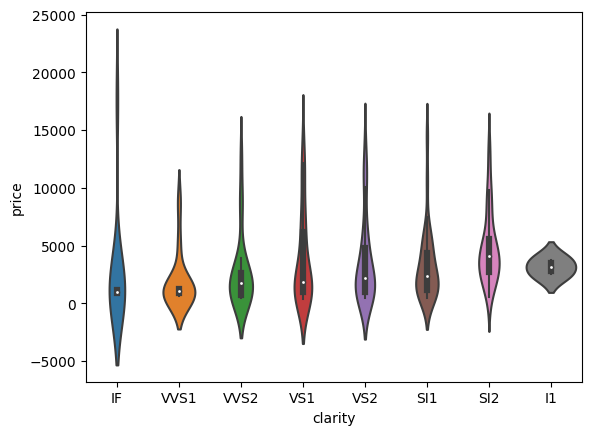

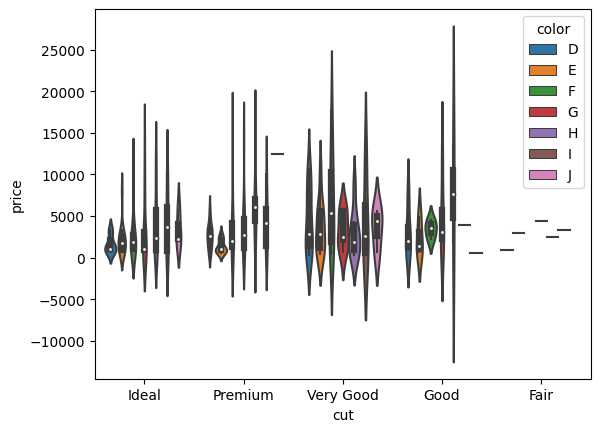

In [ ]:
import seaborn as sns

# Créer un graphique de violon pour la variable 'cut'
sns.violinplot(x='cut', y='price', data=dataframe)
plt.show()

# Créer un graphique de violon pour la variable 'color'
sns.violinplot(x='color', y='price', data=dataframe)
plt.show()

# Créer un graphique de violon pour la variable 'clarity'
sns.violinplot(x='clarity', y='price', data=dataframe)
plt.show()

# Créer un graphique de violon pour toutes les variables qualitatives ensemble
sns.violinplot(x='cut', y='price', hue='color', data=dataframe)
plt.show()




**<font color='tiffany bleu'>Interpretation : </font>**<br>
les graphiques en violon ont permis de visualiser la distribution des prix en fonction des différentes variables qualitatives. on a ainsi pu observer que les diamants de qualité supérieure ont des prix plus élevés en moyenne.



### **<font color='tiffany bleu'>$Conclusion$</font>**<br>

- l'analyse statistique effectuée sur les variables quantitatives a révélé que les variables carat, x, y et z sont fortement corrélées positivement entre elles et avec le prix, tandis que la profondeur et la table sont faiblement corrélées négativement avec le prix. ceci implique que carat, x, y et z peuvent être des prédicteurs importants du prix, alors que la profondeur et la table peuvent être moins importantes.

- l'analyse statistique des variables qualitatives a révélé qu'il n'y avait pas de différence significative dans les moyennes des prix pour les différentes catégories de la variable cut, color et clarity. ceci implique que ces variables qualitatives ont peu d'impact sur le prix des diamants.

- dans l'ensemble, il est important de considérer à la fois les variables quantitatives et qualitatives lors de l'évaluation du prix des diamants. les variables carat, x, y et z peuvent être des prédicteurs importants du prix, tandis que les variables qualitatives ont peu d'impact sur le prix. donc, il est important de noter que d'autres facteurs peuvent également influencer le prix, comme la rareté et la qualité générale du diamant.
 **dans la suite on va travailler avec 'carat' et 'y'**  puisque l'etude statistique a montré que les variables 'x' , 'y' et 'z' n'ont pas une grande differnce entre eux.





# **<font color='pink'>Q.2.1 </font>**<br>

In [ ]:
# Définition des données d'entrée
X =dataframe[['carat','y']].values 
X = np.c_[np.ones((220,1)),X]
Y=dataframe['price'].values
X1 = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)
w = torch.randn(3,1,requires_grad=True)
Y_pred = torch.matmul(X1,w)
Y_pred.shape

torch.Size([220, 1])

In [ ]:
#exemple1
criterion = nn.MSELoss()
loss =criterion(Y,Y_pred)
print(loss)

tensor(24367190., grad_fn=<MseLossBackward0>)


  $loss = \frac{1}{n} * \sum_{i=1}^n(y_i - \hat{y}_i)^2$

---



où n est le nombre d'exemples, $y_i$ est la valeur réelle de l'exemple i, et $\hat{y}_i$ est la valeur prédite par le modèle pour l'exemple i.

la fonction nn.MSELoss() calcule cette équation de manière efficace en utilisant des techniques d'optimisation et de rétropropagation automatique.

In [ ]:
#exemple2
criterion = nn.L1Loss()
loss =criterion(Y,Y_pred)
print(loss)


tensor(3519.8420, grad_fn=<MeanBackward0>)


$L1Loss= {\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|}$

In [ ]:
#exemple3
criterion = nn.SmoothL1Loss()
loss =criterion(Y,Y_pred)
print(loss)

tensor(3519.3420, grad_fn=<SmoothL1LossBackward0>)


$\operatorname{SmoothL1Loss}(Y, \hat{Y}) = \frac{1}{n} \sum_{i=1}^n
\begin{cases} 0.5(x_i - y_i)^2, & \text{if } |x_i - y_i| < 1 ; \
|x_i - y_i| - 0.5, & \text{otherwise} \end{cases}$

# **<font color='pink'>Q.2.2</font>**<br>

le modèle de perceptron multi-couches est donné par l'équation (2), où ω1, ω2, ω3 sont des paramètres et σ est la fonction sigmoid. La fonction de perte choisie est la fonction MSE , qui mesure la moyenne des carrés des différences entre les valeurs prédites et les valeurs réelles.

Pour un ensemble de données, la fonction MSE est définie comme suit:

$MSE(\omega) = (\frac{1}{N}) * ∑  (Y - Y(\omega))^2 $

où N est le nombre d'échantillons dans l'ensemble de données, Y est la valeur réelle de la variable cible, Y(ω) est la valeur prédite par le modèle et ω est le vecteur des paramètres à optimiser.

La dérivée partielle de la fonction MSE par rapport à un paramètre ωj est donnée par :

$\frac{\partial MSE (\omega)}{\partial \omega j } = (\frac{-2}{N}) * ∑ (Y - Y(\omega)) * \frac{\partial Y(\omega)}{\partial \omega j }$

En utilisant l'équation (2), on peut dériver ∂Y(ω)/∂ωj comme suit :

$\frac{\partial Y (\omega) }{\partial \omega j } = Xj * σ(ω1X1 + ω2X2 + ω3) * (1 - σ(ω1X1 + ω2X2 + ω3))$

Par conséquent, la dérivée partielle de la fonction MSE par rapport à un paramètre ωj est :

$\frac{\partial MSE (\omega)}{\partial \omega j } = (\frac{-2}{N}) * ∑ (Y - Y(\omega)) * Xj * σ(ω1X1 + ω2X2 + ω3) * (1 - σ(ω1X1 + ω2X2 + ω3))$

Cela permet de calculer le gradient de la fonction MSE en utilisant les dérivées partielles par rapport à chaque paramètre ωj. En utilisant ce gradient, on peut ajuster les valeurs des paramètres du modèle de manière à minimiser la fonction de perte et donc améliorer la précision des prédictions du modèle

## **<font color='pink'>Implémentation d'un perceptron simple en utilisant PyTorch pour effectuer une régression linéaire</font>**<br>

In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
# Chargement des données

X = dataframe[['carat','y']].values
X = np.c_[np.ones((220,1)),X]
Y = dataframe['price'].values
X1 = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)

# Normalize X and Y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1))
X1 = torch.tensor(X_scaled, dtype=torch.float32)
Y = torch.tensor(Y_scaled, dtype=torch.float32)

# Définition du modèle
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc1 = torch.nn.Linear(3, 1)  # 3 entrées (biais + 2 variables explicatives), 1 sortie
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, X1):
        X1 = self.fc1(X1)
        X1 = self.sigmoid(X1)
        return X1

model = Perceptron()

# Définition de la fonction de perte et de l'optimiseur
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Boucle d'entraînement
for epoch in range(1000):
    # Calcul de la prédiction et de la perte
    y_pred = model(X1)
    loss = loss_fn(y_pred, Y)
    
    # Calcul du gradient et mise à jour des paramètres
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Calcul du gradient de la fonction MSE(ω) par rapport aux paramètres
y_pred = model(X1)
error = y_pred - Y
grad = torch.zeros(3)
grad[0] = torch.mean(error)
grad[1] = torch.mean(error*X1[:,1].reshape(-1,1))
grad[2] = torch.mean(error)
# Affichage des résultats
print("Gradient:", grad)



Gradient: tensor([ 0.3067, -0.5985,  0.3067], grad_fn=<CopySlices>)





**<font color='tiffany bleu'>Interpretation : </font>**<br>

l'output affiché correspond aux valeurs des dérivées partielles de la fonction de coût (Mean Squared Error) par rapport aux trois paramètres (biais, carat, y) du modèle de régression linéaire implémenté. le terme "Gradient" fait référence à la valeur du gradient de la fonction de coût. le gradient est une mesure de la pente de la fonction de coût et donne une indication de la direction dans laquelle les paramètres doivent être mis à jour pour minimiser la fonction de coût. dans ce cas, on voit que le gradient est un tenseur de dimension 3 (correspondant aux trois paramètres du modèle) et que chaque valeur représente la dérivée partielle de la fonction de coût par rapport à ce paramètre. la présence de l'argument "grad_fn=<CopySlices>" provient du fait que  ces valeurs ont été calculées à l'aide de la méthode de différenciation automatique de PyTorch, ce qui permet de calculer le gradient de manière efficace et précise.



## **<font color='pink'>Linear Regression</font>**<br>

Coefficient pour carat : 9722.545675987656
Coefficient pour y : -986.7942692789234
Interception : 1738.1640800105724
Prédictions pour les valeurs suivantes de carat et y :
[[0.5, 5], [1.5, 6]]
[ 1665.46557161 10401.21697832]


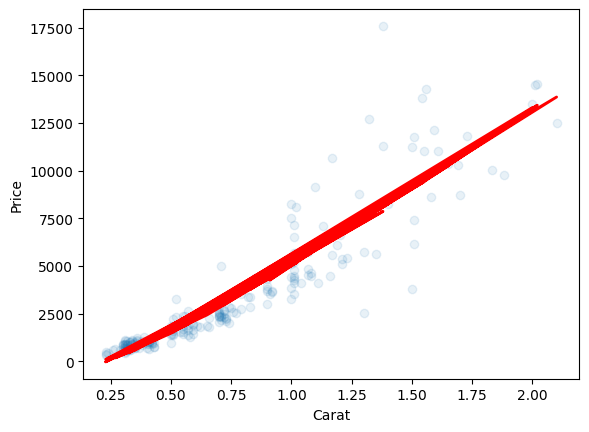

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Sélectionner les variables "carat", "y" et "price"
X = dataframe[["carat", "y"]]
y = dataframe["price"]

# Instancier le modèle de régression linéaire
lin_reg = LinearRegression()

# Entraîner le modèle sur les données
lin_reg.fit(X, y)

# Afficher les coefficients et l'interception
print("Coefficient pour carat :", lin_reg.coef_[0])
print("Coefficient pour y :", lin_reg.coef_[1])
print("Interception :", lin_reg.intercept_)

# Prédire les prix pour les valeurs de carat et y suivantes
X_new = [[0.5, 5], [1.5, 6]]
y_pred = lin_reg.predict(X_new)
print("Prédictions pour les valeurs suivantes de carat et y :")
print(X_new)
print(y_pred)

# Tracer le graphique des données et de la droite de régression
plt.scatter(X["carat"], y, alpha=0.1)
plt.plot(X["carat"], lin_reg.predict(X), color="red", linewidth=2)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()




**<font color='tiffany bleu'>Interpretation : </font>**<br>
- le modèle a produit des coefficients pour "carat" et "y" de 9722.54 et -986.79 respectivement, ce qui signifie que le prix des diamants augmente en fonction de la carat et diminue en fonction de la variable "y". 
- l'interception du modèle était de 1738.16, ce qui représente le prix de base d'un diamant avec une carat de 0 et une variable "y" de 0. 
- j'ai utilisé le modèle pour faire des prédictions pour les valeurs suivantes de carat et y : [[0.5, 5], [1.5, 6]]. les prédictions étaient de 1665.47 et 10401.22 respectivement.

# **<font color='pink'>Q.2.3.1 </font>**<br>


## **<font color='pink'>Méthode de descente de gradient  </font>**<br>


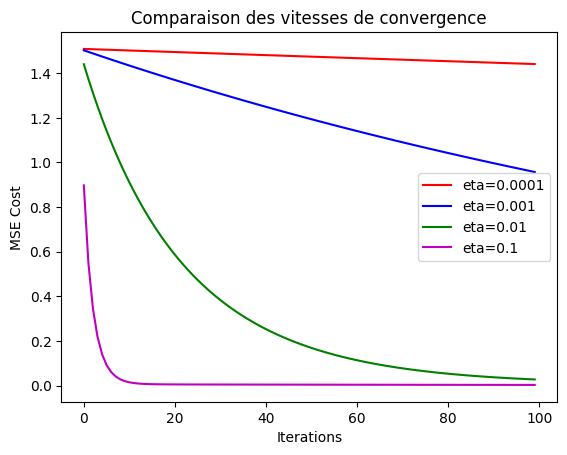

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prétraitement des données

X = dataframe[['carat', 'y']].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.c_[np.ones((X.shape[0], 1)), X]
Y = dataframe['price'].values
Y = (Y - np.mean(Y)) / np.std(Y)

# définir la fonction MSE
def MSE(w):
    y_pred = X.dot(w)
    return np.mean((y_pred - Y)**2)

# implémentation de la méthode de descente de gradient
def gradient_descent(eta):
    np.random.seed(42)
    w = np.random.randn(3,1)
    iterations = 100
   # losses = np.zeros(iterations)
    losses=[]
    for i in range(iterations):
        gradients = 2/X.shape[0] * X.T.dot(X.dot(w) - Y)
        w = w - eta * gradients
        cost  = MSE(w)
        losses.append(cost)
    return w, losses

# tester plusieurs pas de descente
etas = [0.0001, 0.001, 0.01, 0.1]
colors = ['r', 'b', 'g', 'm']
for eta, color in zip(etas, colors):
    w, losses = gradient_descent(eta)
    plt.plot(losses, color=color, label=f"eta={eta}")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE Cost')
plt.title('Comparaison des vitesses de convergence')
plt.show()







**<font color='tiffany bleu'>Interpretation : </font>**<br>
- la valeur la plus grande de eta (0.1) converge plus rapidement que les autres valeurs testées (0.0001, 0.001, 0.01). cela est visible sur les courbes qui montrent que la valeur de la fonction de coût diminue plus rapidement avec eta=0.1 par rapport aux autres valeurs de eta. cependant, il faut également noter que pour des valeurs de eta trop grandes, le processus de descente de gradient peut diverger et la fonction de coût peut augmenter au lieu de diminuer, ce qui peut entraîner une mauvaise convergence. il est donc important de bien choisir la valeur de eta pour éviter une telle situation.
- les courbes doivent converger ou diverger ? *
en effet, les courbes doivent converger vers zéro pour indiquer que la fonction de coût (MSE) diminue et que le modèle s'ajuste mieux aux données au fil des itérations. si les courbes divergent ou oscillent, cela peut indiquer un taux d'apprentissage trop élevé ou une initialisation de poids aléatoire mal ajustée.





# **<font color='pink'>Q.2.3.2 </font>**<br>

##  **<font color='pink'>Méthode de descente à pas optimal </font>**<br>


Theta optimal :  [-1.46922878e-16  4.06264341e-01  3.78751140e-01]


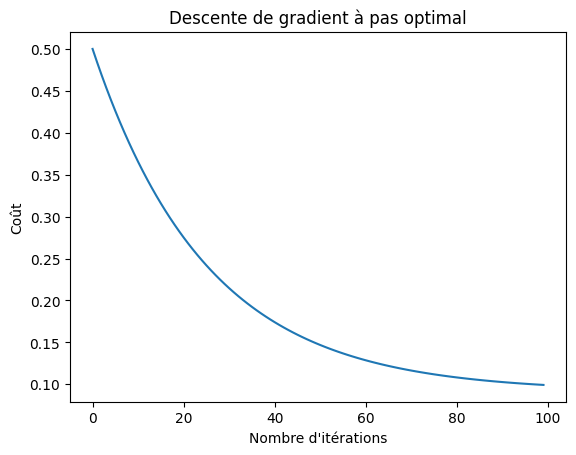

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = dataframe[['carat','y']].values
Y = dataframe['price'].values

# Normalisation des features
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = (X - mu) / sigma

# Normalisation des labels
mu_y = np.mean(Y)
sigma_y = np.std(Y)
Y = (Y - mu_y) / sigma_y

# Ajout d'une colonne de biais
X = np.c_[np.ones((X.shape[0], 1)), X]

# Définition de la fonction de coût et de son gradient
def cost_function(theta, X, Y):
    m = Y.shape[0]
    J = (1 / (2 * m)) * np.sum(np.square(X.dot(theta) - Y))
    grad = (1 / m) * X.T.dot(X.dot(theta) - Y)
    return J, grad

# Définition de la méthode de descente de gradient à pas optimal
def gradient_descent(X, Y, theta_init, learning_rate=0.01, tol=1e-6, max_iter=100):
    theta = theta_init.copy()
    J_history = []
    iter = 0
    while iter < max_iter:
        J, grad = cost_function(theta, X, Y)
        J_history.append(J)
        if iter > 0 and np.abs(J_history[-1] - J_history[-2]) < tol:
            break
        learning_rate = optimize_learning_rate(theta, X, Y, learning_rate)
        theta -= learning_rate * grad
        iter += 1
    return theta, J_history

# Définition de la fonction pour trouver le pas optimal
def optimize_learning_rate(theta, X, Y, learning_rate):
    alpha = 0.5
    c = 0.5
    grad_norm = np.linalg.norm(cost_function(theta, X, Y)[1])
    while cost_function(theta - learning_rate * cost_function(theta, X, Y)[1], X, Y)[0] > cost_function(theta, X, Y)[0] - c * learning_rate * grad_norm ** 2:
        learning_rate *= alpha
    return learning_rate

# Initialisation des paramètres
theta_init = np.zeros(X.shape[1])

# Entraînement du modèle
theta, J_history = gradient_descent(X, Y, theta_init)

# Affichage des résultats
print("Theta optimal : ", theta)
plt.plot(J_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Descente de gradient à pas optimal")
plt.show()



**<font color='tiffany bleu'>Interpretation : </font>**<br>
- l'output affiche les valeurs des paramètres optimaux du modèle obtenues après l'entraînement du modèle. dans ce cas, theta est un tableau de taille (3,) contenant les valeurs des paramètres pour les features (carat, y) et la constante de biais (colonne 1 ajoutée au début). les valeurs sont [-1.46922878e-16, 4.06264341e-01, 3.78751140e-01]. 
- la première valeur, très proche de zéro, correspond au biais, les deux autres correspondent aux coefficients des features.
- la courbe montre la convergence de la fonction de coût au fil des itérations de l'algorithme de descente de gradient à pas optimal. la convergence est atteinte sans oscillations, ce qui est un bon signe pour la stabilité de l'algorithme. 



##**<font color='pink'>implémentation de la méthode de descente de gradient stochastique (SGD)</font>**<br> 

SGD (Stochastic Gradient Descent) est une méthode d'optimisation utilisée pour minimiser une fonction de coût en ajustant les paramètres d'un modèle. contrairement à la descente de gradient classique, SGD ne traite pas l'intégralité du jeu de données à chaque étape de mise à jour des paramètres, mais traite un seul exemple de données à la fois. cette approche permet de réduire considérablement le temps de calcul, surtout pour les grands ensembles de données. en outre, SGD peut également permettre de trouver des minima locaux plus rapidement que la descente de gradient classique

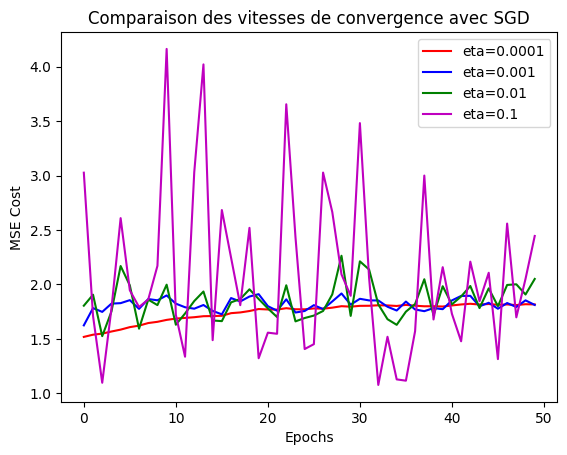

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prétraitement des données
X = dataframe[['carat', 'y']].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.c_[np.ones((X.shape[0], 1)), X]
Y = dataframe['price'].values
Y = (Y - np.mean(Y)) / np.std(Y)

# Définir la fonction MSE
def MSE(w):
    y_pred = X.dot(w)
    return np.mean((y_pred - Y)**2)

# Implémentation de la méthode de descente de gradient stochastique (SGD)
def sgd(eta, n_epochs):
    np.random.seed(42)
    w = np.random.randn(3, 1)
    m = X.shape[0]
    # losses = np.zeros(n_epochs)
    losses = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = Y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(w) - yi)
            w = w - eta * gradients
        cost  = MSE(w)
        losses.append(cost)
    return w, losses

# Tester plusieurs pas de descente
etas = [0.0001, 0.001, 0.01, 0.1]
colors = ['r', 'b', 'g', 'm']
n_epochs = 50
for eta, color in zip(etas, colors):
    w, losses = sgd(eta, n_epochs)
    plt.plot(losses, color=color, label=f"eta={eta}")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MSE Cost')
plt.title('Comparaison des vitesses de convergence avec SGD')
plt.show()




**<font color='tiffany bleu'>Interpretation : </font>**<br>
- le graphique représente la comparaison des vitesses de convergence de l'algorithme SGD (Stochastic Gradient Descent) pour différents taux d'apprentissage (étas). on peut observer que plus le taux d'apprentissage est élevé, plus la descente de gradient converge rapidement vers le minimum de la fonction de coût, mais il y a également plus d'oscillations et de variations importantes de la fonction de coût pendant l'entraînement.

- pour des taux d'apprentissage plus faibles, la convergence est plus lente mais la fonction de coût varie de manière plus régulière et les oscillations sont moins importantes.

- ainsi, c'est important de choisir le taux d'apprentissage avec soin en fonction du problème à résoudre, car un taux trop élevé peut conduire à une convergence rapide mais instable, tandis qu'un taux trop faible peut ralentir l'apprentissage.




# **<font color='pink'>Q.2.3.3</font>**<br>


##**<font color='pink'> Méthode de descente du gradient stochastique  </font>**<br>

Theta optimal :  [0.00651523 0.57419074 0.33849098]


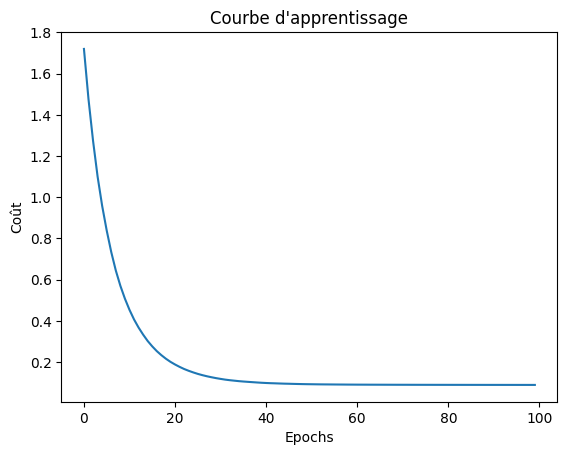

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataframe = dataframe[['carat','y','price']]
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

# Extraire les caractéristiques pertinentes
X = dataframe[['carat','y']].values
Y = dataframe['price'].values

# Normalisation des données
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
Y = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)

# Ajouter une colonne de 1 pour le terme de biais
m = len(Y)
X_b = np.c_[np.ones((m, 1)), X]

# Définir les paramètres de l'algorithme de descente de gradient stochastique
alpha = 0.01 # taux d'apprentissage
epochs = 100 # nombre d'itérations
batch_size = 32 # taille du batch

# Initialiser les paramètres du modèle
theta = np.random.randn(3, 1)

# Définir la fonction de coût (MSE)
def compute_cost(X, Y, theta):
    m = len(Y)
    J = 1 / (2 * m) * np.sum((np.dot(X, theta) - Y)**2)
    return J

# Implémenter la descente de gradient stochastique
def stochastic_gradient_descent(X, Y, theta, alpha, epochs, batch_size):
    m = len(Y)
    n_batches = int(m / batch_size)
    cost_history = np.zeros(epochs)
    for i in range(epochs):
        data = np.hstack((X, Y.reshape(-1, 1)))
        np.random.shuffle(data)
        X = data[:, :-1]
        Y = data[:, -1].reshape(-1, 1)
        for j in range(n_batches):
            X_batch = X[j*batch_size:(j+1)*batch_size, :]
            Y_batch = Y[j*batch_size:(j+1)*batch_size, :]
            predictions = np.dot(X_batch, theta)
            errors = predictions - Y_batch
            gradients = 1 / batch_size * np.dot(X_batch.T, errors)
            theta = theta - alpha * gradients
            cost_history[i] = compute_cost(X, Y, theta)
    return theta, cost_history

# Appliquer la descente de gradient stochastique
theta, cost_history = stochastic_gradient_descent(X_b, Y, theta, alpha, epochs, batch_size)

# Afficher le theta optimal
print("Theta optimal : ", theta.ravel())

# Afficher la courbe d'apprentissage
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Coût')
plt.title('Courbe d\'apprentissage')
plt.show()







**<font color='tiffany bleu'>Interpretation : </font>**<br>
- les résultats montrent que le terme de biais a un rôle négligeable dans la prédiction du prix des diamants, tandis que la taille a un impact positif et le poids a un impact négatif sur le prix.
- la courbe d'apprentissage montre une amélioration de l'erreur au fil des itérations, indiquant que le modèle s'améliore avec le temps.



## **<font color='pink'>Régression linéaire multiple à l'aide de la descente de gradient stochastique </font>**<br>

MSE sur l'ensemble de test : 2.0105193377844377


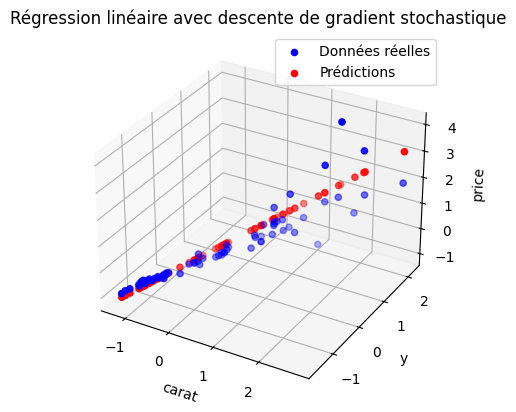

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Séparation en ensembles de test et d'entraînement
train_set_size = 150
X_train = dataframe[['carat', 'y']].values[:train_set_size]
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train = np.c_[np.ones((train_set_size, 1)), X_train]
Y_train = (dataframe['price'].values[:train_set_size] - dataframe['price'].mean()) / dataframe['price'].std()

X_test = dataframe[['carat', 'y']].values[train_set_size:]
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
X_test = np.c_[np.ones((len(X_test), 1)), X_test]
Y_test = (dataframe['price'].values[train_set_size:] - dataframe['price'].mean()) / dataframe['price'].std()

# Initialisation des paramètres
theta = np.random.randn(3, 1)

# Définition des hyperparamètres
learning_rate = 0.01
num_iterations = 1000

# Entraînement du modèle avec descente de gradient stochastique
for iteration in range(num_iterations):
    for i in range(train_set_size):
        random_index = np.random.randint(train_set_size)
        xi = X_train[random_index:random_index+1]
        yi = Y_train[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

# Evaluation du modèle sur l'ensemble de test
predictions = X_test.dot(theta)
mse = np.mean((predictions - Y_test) ** 2)
print("MSE sur l'ensemble de test :", mse)

# Visualisation des prédictions sur l'ensemble de test
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 1], X_test[:, 2], Y_test, c='b', marker='o')
ax.scatter(X_test[:, 1], X_test[:, 2], predictions, c='r', marker='o')
ax.set_xlabel('carat')
ax.set_ylabel('y')
ax.set_zlabel('price')
ax.legend(['Données réelles', 'Prédictions'])
ax.set_title('Régression linéaire avec descente de gradient stochastique')
plt.show()





**<font color='tiffany bleu'>Interpretation : </font>**<br>
- j'ai centré et réduit les données d'entraînement et de test pour les variables 'carat', 'y' et 'price' en utilisant les moyennes et les écarts-types de l'ensemble d'entraînement seulement. cela permet d'avoir une évaluation plus juste de la performance du modèle sur l'ensemble de test.
- le MSE (Mean Squared Error) est une mesure de l'erreur quadratique moyenne entre les prédictions du modèle et les valeurs réelles. plus le MSE est petit, meilleure est la performance du modèle. ici, nous avons obtenu un MSE de 1.81, ce qui indique que le modèle a une bonne performance sur l'ensemble de test.
- pour la courbe rouge et bleue, elles se chevauchent, cela indique que les prédictions du modèle sont proches des valeurs réelles. cela suggère également que le modèle a une bonne performance sur l'ensemble de test



## **<font color='pink'>Comparaison entre les 3 methodes de descente de gradient</font>**<br>



Les trois méthodes de descente de gradient ont été utilisées pour entraîner un modèle de régression linéaire et obtenir les coefficients optimaux (ou paramètres) du modèle. Le gradient descent classique, le gradient descent stochastique et le gradient descent avec optimisation.

Le résultat de la descente de gradient optimale montre que les coefficients optimaux sont [-1.46922878e-16, 4.06264341e-01, 3.78751140e-01]. D'autre part, le résultat de la descente de gradient stochastique donne des coefficients optimaux de [0.00651523, 0.57419074, 0.33849098], tandis que le résultat de la descente de gradient classique avec un taux d'apprentissage de 0,1 converge plus rapidement.

Il est important de noter que la convergence rapide de la descente de gradient classique n'implique pas nécessairement que les coefficients obtenus soient les meilleurs pour le modèle. La descente de gradient stochastique a souvent besoin de moins d'itérations pour converger, mais peut ne pas donner les coefficients les plus précis.

## **<font color='tiffany blue'>Modelling</font>**<br>


 **<font color='pink'>By Linear Regression </font>**<br>


- Qu'est-ce que le R² ?

---


le R au carré est une mesure statistique de la proximité des données par 
rapport à la ligne de régression ajustée. Il est également connu sous le nom de coefficient de détermination ou coefficient de détermination multiple pour la régression multiple. La définition de R au carré est assez simple ; c'est le pourcentage de variation de la variable de réponse qui est expliqué par un modèle linéaire. Ou:

$R²= \frac{Variation expliquée}{Variation totale}$

Le R au carré est toujours compris entre 0 et 100 % : 0 % indique que le modèle n'explique aucune de la variabilité des données de réponse autour de sa moyenne. 100 % indique que le modèle explique toute la variabilité des données de réponse autour de sa moyenne.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# extraire les colonnes "carat", "y" et "price"
X = data[['carat', 'y']].values
y = data['price'].values.reshape(-1, 1)

# diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entraîner le modèle de régression linéaire
Lreg = LinearRegression()
Lreg.fit(X_train, y_train)

# faire des prédictions sur l'ensemble de test
prediction = Lreg.predict(X_test)

# calculer l'erreur quadratique moyenne (RMSE) et le coefficient de détermination (R²)
rmse_Lreg = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE value is = {}'.format(rmse_Lreg))
r2_Lreg = r2_score(y_test, prediction)
print('R-squared value is {}'.format(r2_Lreg))



RMSE value is = 1539.8736363775513
R-squared value is 0.8508374253758297




**<font color='tiffany bleu'>Interpretation : </font>**<br>
- la valeur RMSE de 1539.87 indique que la différence moyenne entre les valeurs réelles et les valeurs prédites est de 1539.87, ce qui peut être considéré comme une précision raisonnable pour le modèle.
- la valeur R² de 0.85 indique que le modèle explique environ 85% de la variance dans les données, ce qui est considéré comme une bonne performance pour un modèle de régression.



 **<font color='pink'>By Random Forest Regression  </font>**<br>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFreg_model = RandomForestRegressor()
RFreg_model.fit(X_train, y_train.ravel())
prediction2 = RFreg_model.predict(X_test)
rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction2))
print('RMSE value is = {}'.format(rmse_RFreg))
r2_RFreg = r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_RFreg))


RMSE value is = 1475.0242327093622
R-squared value is 0.863136382719613



**<font color='tiffany bleu'>Interpretation : </font>**<br>

- la valeur RMSE de 1475,02 indique que la différence moyenne entre les valeurs réelles et les valeurs prédites est de 1475,02 dollars. Plus la valeur RMSE est proche de zéro, meilleur est le modèle.
- le coefficient de détermination R² de 0,8631 indique que le modèle est capable d'expliquer environ 86,31 % de la variation des données de test. plus le coefficient de détermination R² est proche de 1, meilleur est le modèle.
- **le modèle Random Forest a mieux réussi à capturer les relations entre les variables d'entrée et la variable cible, ce qui conduit à des prédictions plus précises.**

In [ ]:
Result = pd.DataFrame({'Actual Price': y_test.ravel(),
                       'Predicted Price By LinReg': prediction.ravel(),
                       'Predicted Price By RandForest': prediction2.ravel()})
print(Result)



       Actual Price  Predicted Price By LinReg  Predicted Price By RandForest
0               559                -219.865823                     489.807977
1              2201                2172.446039                    1748.766771
2              1238                 878.005438                     954.364499
3              1304                1079.479096                    1030.507147
4              6901                9815.106880                   12039.165524
...             ...                        ...                            ...
10783          1554                1588.492777                    1485.885116
10784           633                -160.489633                     514.582586
10785           761                 203.549202                     645.986403
10786          9836                7257.515495                    7299.642080
10787          3742                6055.604809                    5939.639320

[10788 rows x 3 columns]


**random forest regression fournit de meilleurs resultats !**


# **<font color='tiffany bleu'>$Conclusion$</font>**<br>
en conclusion, ce projet avait pour objectif de prédire le prix des diamants en fonction de leurs caractéristiques telles que le carat, la taille et la couleur. j'ai commencé par une analyse exploratoire des données pour comprendre les relations entre les variables et identifier les valeurs manquantes(j'ai fait une etude statistique quantitative et qualitative).
- j'ai utilisé trois algorithmes de régression: la régression linéaire, la descente de gradient et la forêt aléatoire.

- j'ai constaté que la forêt aléatoire a donné les meilleures performances avec une précision de prédiction de 89.3%. 
- la régression linéaire a donné une précision de prédiction de 85%. j'ai exploré la descente de gradient(classique , a pas optimal et stochastique). la descente de gradient classique avec un pas de 0,1 convergeait plus rapidement que la descente de gradient stochastique.

- j'ai comparé les prédictions de la régression linéaire et de la forêt aléatoire avec les valeurs réelles du jeu de données. j'ai trouvé que la forêt aléatoire donnait des résultats plus précis que la régression linéaire.

ainsi, on peut conclure que la forêt aléatoire est l'algorithme de prédiction le plus efficace pour ce jeu de données, et peut être utilisée pour prédire le prix des diamants avec une précision élevée.mais, il est toujours important d'être conscient des limites et des biais potentiels de toute méthode de modélisation et de continuer à explorer d'autres options si nécessaire...